In [3]:
import os
import numpy as np
import librosa
from glob import glob
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Get all audio file paths

In [4]:
audio_files = glob('D:/Ausa internshp/Steth-main/Steth-main/database/Audio Files/*.wav')

Data Acquisition

In [5]:
def load_audio_files(file_paths):
    audio_data = []
    for path in file_paths:
        data, sr = librosa.load(path, sr=None)
        audio_data.append((data, sr))
    return audio_data

Data Preprocessing

In [6]:
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def preprocess_audio(data, sr, duration=2.5):
    data = butter_bandpass_filter(data, 25, 400, sr)
    data = librosa.util.fix_length(data, int(sr * duration))
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data

def preprocess_dataset(audio_files):
    dataset = []
    labels = []
    for i, (data, sr) in enumerate(audio_files):
        processed_data = preprocess_audio(data, sr)
        dataset.append(processed_data)
        labels.append(i % 2)  # Example labels, modify according to your actual label data
    return np.array(dataset), np.array(labels)


Data Augmentation

In [7]:
def augment_data(data, labels):
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    smote = SMOTE()
    augmented_data, augmented_labels = smote.fit_resample(data, labels)
    return augmented_data, augmented_labels

Bispectrum Transformation (placeholder with STFT)

In [8]:
def compute_bispectrum(data, sr):
    S = np.abs(librosa.stft(data))
    return S

def transform_to_images(dataset):
    images = []
    for data in dataset:
        bispectrum = compute_bispectrum(data, sr=1000)
        images.append(bispectrum)
    images = np.array(images)
    images = images[:, np.newaxis, :, :]
    return images

Hybrid Model Development

In [9]:
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(24, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(48, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    return model

def create_hybrid_model(input_shape):
    cnn_model = create_cnn_model(input_shape)
    return cnn_model


Split Dataset

In [10]:
def split_dataset(images, labels):
    return train_test_split(images, labels, test_size=0.2, random_state=42)

Model Training

In [11]:
def train_hybrid_model(cnn_model, train_images, train_labels):
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(train_images, to_categorical(train_labels), epochs=10, batch_size=32)
    return cnn_model

Model Evaluation

In [12]:
def evaluate_model(cnn_model, test_images, test_labels):
    loss, accuracy = cnn_model.evaluate(test_images, to_categorical(test_labels))
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    predictions = cnn_model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    precision = precision_score(test_labels, y_pred, average='weighted')
    recall = recall_score(test_labels, y_pred, average='weighted')
    f1 = f1_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')


In [13]:
audio_data = load_audio_files(audio_files)
data, labels = preprocess_dataset(audio_data)
augmented_data, augmented_labels = augment_data(data, labels)
images = transform_to_images(augmented_data)
train_images, test_images, train_labels, test_labels = split_dataset(images, augmented_labels)

input_shape = (1, images.shape[2], images.shape[3])
hybrid_model = create_hybrid_model(input_shape)
trained_model = train_hybrid_model(hybrid_model, train_images, train_labels)
evaluate_model(trained_model, test_images, test_labels)

TypeError: fix_length() takes 1 positional argument but 2 were given

In [14]:
import os
import numpy as np
import librosa
from glob import glob
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get all audio file paths
audio_files = glob('D:/Ausa internshp/Steth-main/Steth-main/database/Audio Files/*.wav')

# Step 1: Data Acquisition
def load_audio_files(file_paths):
    audio_data = []
    for path in file_paths:
        data, sr = librosa.load(path, sr=None)
        audio_data.append((data, sr))
    return audio_data

# Step 2: Data Preprocessing
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def preprocess_audio(data, sr, duration=2.5):
    data = butter_bandpass_filter(data, 25, 400, sr)
    data = librosa.util.fix_length(data, size=int(sr * duration))
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data

def preprocess_dataset(audio_files):
    dataset = []
    labels = []
    for i, (data, sr) in enumerate(audio_files):
        processed_data = preprocess_audio(data, sr)
        dataset.append(processed_data)
        labels.append(i % 2)  # Example labels, modify according to your actual label data
    return np.array(dataset), np.array(labels)

# Step 3: Data Augmentation
def augment_data(data, labels):
    data = data.reshape((data.shape[0], -1))  # Reshape data for SMOTE
    smote = SMOTE()
    augmented_data, augmented_labels = smote.fit_resample(data, labels)
    augmented_data = augmented_data.reshape((augmented_data.shape[0], int(data.shape[1] ** 0.5), int(data.shape[1] ** 0.5)))  # Reshape back to 2D
    return augmented_data, augmented_labels

# Step 4: Bispectrum Transformation (placeholder with STFT)
def compute_bispectrum(data, sr):
    S = np.abs(librosa.stft(data))
    return S

def transform_to_images(dataset):
    images = []
    for data in dataset:
        bispectrum = compute_bispectrum(data, sr=1000)
        images.append(bispectrum)
    images = np.array(images)
    images = images[:, np.newaxis, :, :]
    return images

# Step 5: Hybrid Model Development
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(24, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(48, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    return model

def create_hybrid_model(input_shape):
    cnn_model = create_cnn_model(input_shape)
    return cnn_model

# Step 6: Split Dataset
def split_dataset(images, labels):
    return train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 7: Model Training
def train_hybrid_model(cnn_model, train_images, train_labels):
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(train_images, to_categorical(train_labels), epochs=10, batch_size=32)
    return cnn_model

# Step 8: Model Evaluation
def evaluate_model(cnn_model, test_images, test_labels):
    loss, accuracy = cnn_model.evaluate(test_images, to_categorical(test_labels))
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    predictions = cnn_model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    precision = precision_score(test_labels, y_pred, average='weighted')
    recall = recall_score(test_labels, y_pred, average='weighted')
    f1 = f1_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')

# Main Script
audio_data = load_audio_files(audio_files)
data, labels = preprocess_dataset(audio_data)
augmented_data, augmented_labels = augment_data(data, labels)
images = transform_to_images(augmented_data)
train_images, test_images, train_labels, test_labels = split_dataset(images, augmented_labels)

input_shape = (1, images.shape[2], images.shape[3])
hybrid_model = create_hybrid_model(input_shape)
trained_model = train_hybrid_model(hybrid_model, train_images, train_labels)
evaluate_model(trained_model, test_images, test_labels)


c:\Users\ravi2\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=100
  warnings.warn(
c:\Users\ravi2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 100, 1025)`, `kernel shape=(5, 5, 1025, 24)`, `dilation_rate=[1 1]`.

In [15]:
import os
import numpy as np
import librosa
from glob import glob
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get all audio file paths
audio_files = glob('D:/Ausa internshp/Steth-main/Steth-main/database/Audio Files/*.wav')

# Step 1: Data Acquisition
def load_audio_files(file_paths):
    audio_data = []
    for path in file_paths:
        data, sr = librosa.load(path, sr=None)
        audio_data.append((data, sr))
    return audio_data

# Step 2: Data Preprocessing
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def preprocess_audio(data, sr, duration=2.5):
    # Bandpass filtering
    data = butter_bandpass_filter(data, 25, 400, sr)
    # Truncation
    data = librosa.util.fix_length(data, size=int(sr * duration))
    # Normalization
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data

def preprocess_dataset(audio_files):
    dataset = []
    labels = []
    for i, (data, sr) in enumerate(audio_files):
        processed_data = preprocess_audio(data, sr)
        dataset.append(processed_data)
        labels.append(i % 2)  # Example labels, modify according to your actual label data
    return np.array(dataset), np.array(labels)

# Step 3: Data Augmentation
def augment_data(data, labels):
    data = data.reshape((data.shape[0], -1))  # Reshape data for SMOTE
    smote = SMOTE()
    augmented_data, augmented_labels = smote.fit_resample(data, labels)
    augmented_data = augmented_data.reshape((augmented_data.shape[0], int(data.shape[1] ** 0.5), int(data.shape[1] ** 0.5)))  # Reshape back to 2D
    return augmented_data, augmented_labels

# Step 4: Bispectrum Transformation (placeholder with STFT)
def compute_bispectrum(data, sr):
    S = np.abs(librosa.stft(data, n_fft=256, hop_length=128))
    return S

def transform_to_images(dataset):
    images = []
    for data in dataset:
        bispectrum = compute_bispectrum(data, sr=1000)
        images.append(bispectrum)
    images = np.array(images)
    images = images[:, np.newaxis, :, :]  # Add channel dimension
    return images

# Step 5: Hybrid Model Development
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(24, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(48, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    return model

def create_hybrid_model(input_shape):
    cnn_model = create_cnn_model(input_shape)
    return cnn_model

# Step 6: Split Dataset
def split_dataset(images, labels):
    return train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 7: Model Training
def train_hybrid_model(cnn_model, train_images, train_labels):
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(train_images, to_categorical(train_labels), epochs=10, batch_size=32)
    return cnn_model

# Step 8: Model Evaluation
def evaluate_model(cnn_model, test_images, test_labels):
    loss, accuracy = cnn_model.evaluate(test_images, to_categorical(test_labels))
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    predictions = cnn_model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    precision = precision_score(test_labels, y_pred, average='weighted')
    recall = recall_score(test_labels, y_pred, average='weighted')
    f1 = f1_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')

# Main Script
audio_data = load_audio_files(audio_files)
data, labels = preprocess_dataset(audio_data)
augmented_data, augmented_labels = augment_data(data, labels)
images = transform_to_images(augmented_data)
train_images, test_images, train_labels, test_labels = split_dataset(images, augmented_labels)

input_shape = (images.shape[1], images.shape[2], images.shape[3])  # Adjust input shape for Conv2D layer
hybrid_model = create_hybrid_model(input_shape)
trained_model = train_hybrid_model(hybrid_model, train_images, train_labels)
evaluate_model(trained_model, test_images, test_labels)


c:\Users\ravi2\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=256 is too large for input signal of length=100
  warnings.warn(


ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 100, 129)`, `kernel shape=(5, 5, 129, 24)`, `dilation_rate=[1 1]`.

c:\Users\ravi2\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=256 is too large for input signal of length=100
  warnings.warn(


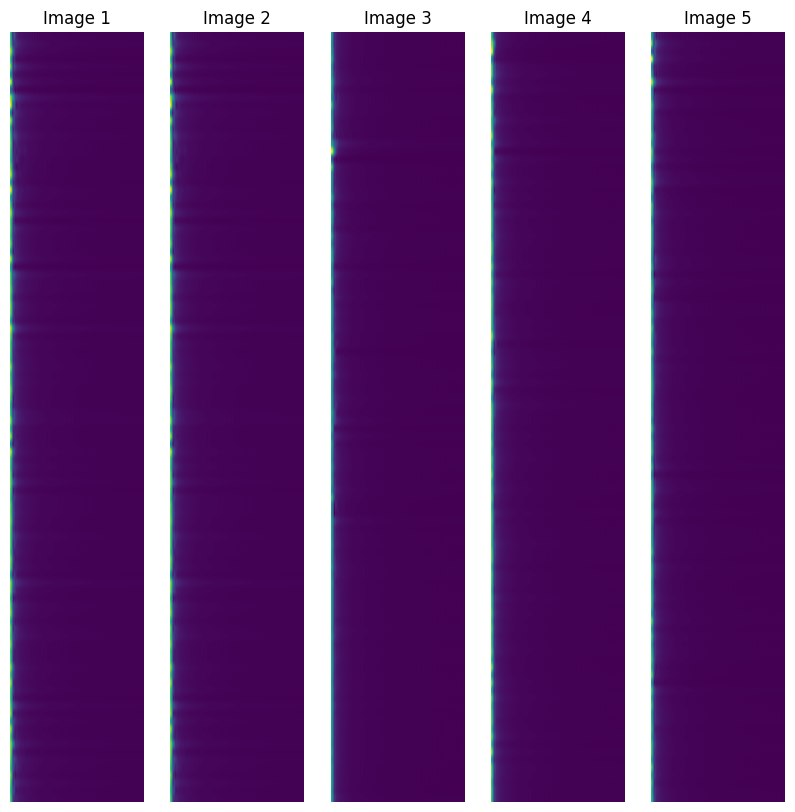

ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 100, 129)`, `kernel shape=(3, 3, 129, 24)`, `dilation_rate=[1 1]`.

In [16]:
import os
import numpy as np
import librosa
from glob import glob
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get all audio file paths
audio_files = glob('D:/Ausa internshp/Steth-main/Steth-main/database/Audio Files/*.wav')

# Step 1: Data Acquisition
def load_audio_files(file_paths):
    audio_data = []
    for path in file_paths:
        data, sr = librosa.load(path, sr=None)
        audio_data.append((data, sr))
    return audio_data

# Step 2: Data Preprocessing
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def preprocess_audio(data, sr, duration=2.5):
    # Bandpass filtering
    data = butter_bandpass_filter(data, 25, 400, sr)
    # Truncation
    data = librosa.util.fix_length(data, size=int(sr * duration))
    # Normalization
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data

def preprocess_dataset(audio_files):
    dataset = []
    labels = []
    for i, (data, sr) in enumerate(audio_files):
        processed_data = preprocess_audio(data, sr)
        dataset.append(processed_data)
        labels.append(i % 2)  # Example labels, modify according to your actual label data
    return np.array(dataset), np.array(labels)

# Step 3: Data Augmentation
def augment_data(data, labels):
    data = data.reshape((data.shape[0], -1))  # Reshape data for SMOTE
    smote = SMOTE()
    augmented_data, augmented_labels = smote.fit_resample(data, labels)
    augmented_data = augmented_data.reshape((augmented_data.shape[0], int(data.shape[1] ** 0.5), int(data.shape[1] ** 0.5)))  # Reshape back to 2D
    return augmented_data, augmented_labels

# Step 4: Bispectrum Transformation (placeholder with STFT)
def compute_bispectrum(data, sr):
    S = np.abs(librosa.stft(data, n_fft=256, hop_length=128))
    return S

def transform_to_images(dataset):
    images = []
    for data in dataset:
        bispectrum = compute_bispectrum(data, sr=1000)
        images.append(bispectrum)
    images = np.array(images)
    images = images[:, np.newaxis, :, :]  # Add channel dimension
    return images

# Step 5: Hybrid Model Development
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(24, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    return model

def create_hybrid_model(input_shape):
    cnn_model = create_cnn_model(input_shape)
    return cnn_model

# Step 6: Split Dataset
def split_dataset(images, labels):
    return train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 7: Model Training
def train_hybrid_model(cnn_model, train_images, train_labels):
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(train_images, to_categorical(train_labels), epochs=10, batch_size=32)
    return cnn_model

# Step 8: Model Evaluation
def evaluate_model(cnn_model, test_images, test_labels):
    loss, accuracy = cnn_model.evaluate(test_images, to_categorical(test_labels))
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    predictions = cnn_model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    precision = precision_score(test_labels, y_pred, average='weighted')
    recall = recall_score(test_labels, y_pred, average='weighted')
    f1 = f1_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')

# Visualization
def visualize_images(images, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i, 0, :, :], aspect='auto', cmap='viridis')
        plt.title(f'Image {i+1}')
        plt.axis('off')
    plt.show()

# Main Script
audio_data = load_audio_files(audio_files)
data, labels = preprocess_dataset(audio_data)
augmented_data, augmented_labels = augment_data(data, labels)
images = transform_to_images(augmented_data)

# Visualize some of the transformed bispectrum images before training
visualize_images(images)

train_images, test_images, train_labels, test_labels = split_dataset(images, augmented_labels)

input_shape = (images.shape[1], images.shape[2], images.shape[3])  # Adjust input shape for Conv2D layer
hybrid_model = create_hybrid_model(input_shape)
trained_model = train_hybrid_model(hybrid_model, train_images, train_labels)
evaluate_model(trained_model, test_images, test_labels)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4.085002558440465e-09..35.77206563461397].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4.085002558440465e-09..35.77206563461397].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.6480080350665958e-09..28.740763734998914].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.496740509310257e-10..43.68288544770384].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.4707843831729406e-09..37.032061797983026].


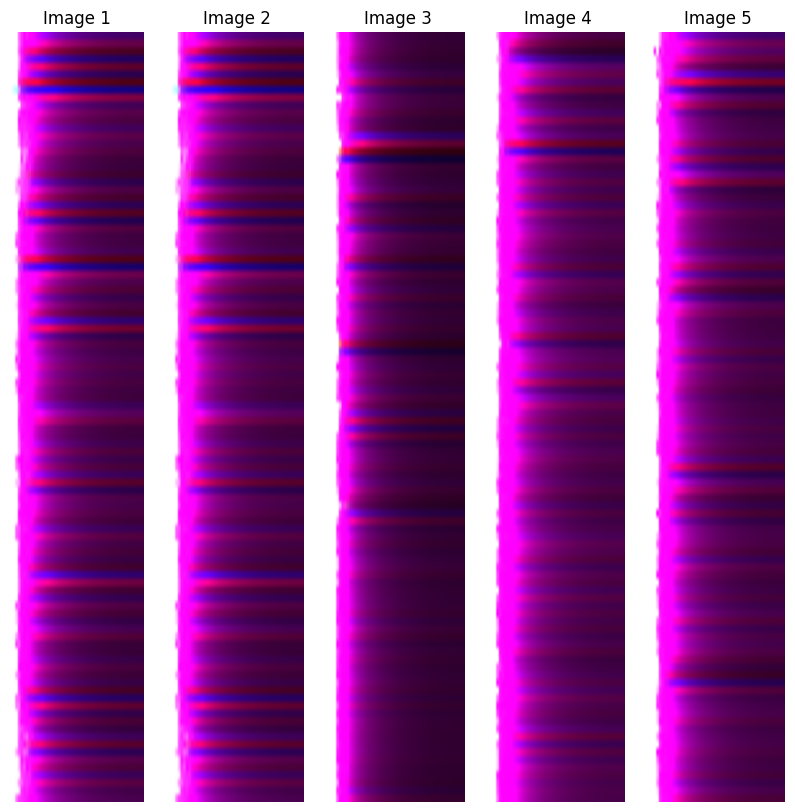

ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 100, 51)`, `kernel shape=(3, 3, 51, 24)`, `dilation_rate=[1 1]`.

In [17]:
import os
import numpy as np
import librosa
from glob import glob
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get all audio file paths
audio_files = glob('D:/Ausa internshp/Steth-main/Steth-main/database/Audio Files/*.wav')

# Step 1: Data Acquisition
def load_audio_files(file_paths):
    audio_data = []
    for path in file_paths:
        data, sr = librosa.load(path, sr=None)
        audio_data.append((data, sr))
    return audio_data

# Step 2: Data Preprocessing
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def preprocess_audio(data, sr, duration=2.5):
    # Bandpass filtering
    data = butter_bandpass_filter(data, 25, 400, sr)
    # Truncation
    data = librosa.util.fix_length(data, size=int(sr * duration))
    # Normalization
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data

def preprocess_dataset(audio_files):
    dataset = []
    labels = []
    for i, (data, sr) in enumerate(audio_files):
        processed_data = preprocess_audio(data, sr)
        dataset.append(processed_data)
        labels.append(i % 2)  # Example labels, modify according to your actual label data
    return np.array(dataset), np.array(labels)

# Step 3: Data Augmentation
def augment_data(data, labels):
    data = data.reshape((data.shape[0], -1))  # Reshape data for SMOTE
    smote = SMOTE()
    augmented_data, augmented_labels = smote.fit_resample(data, labels)
    augmented_data = augmented_data.reshape((augmented_data.shape[0], int(data.shape[1] ** 0.5), int(data.shape[1] ** 0.5)))  # Reshape back to 2D
    return augmented_data, augmented_labels

# Step 4: Bispectrum Transformation (placeholder with STFT)
def compute_bispectrum(data, sr):
    n_fft = min(256, len(data))
    S = np.abs(librosa.stft(data, n_fft=n_fft, hop_length=n_fft//2))
    return S

def transform_to_images(dataset):
    images = []
    for data in dataset:
        bispectrum = compute_bispectrum(data, sr=1000)
        images.append(bispectrum)
    images = np.array(images)
    images = images[:, np.newaxis, :, :]  # Add channel dimension
    return images

# Step 5: Hybrid Model Development
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(24, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    return model

def create_hybrid_model(input_shape):
    cnn_model = create_cnn_model(input_shape)
    return cnn_model

# Step 6: Split Dataset
def split_dataset(images, labels):
    return train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 7: Model Training
def train_hybrid_model(cnn_model, train_images, train_labels):
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(train_images, to_categorical(train_labels), epochs=10, batch_size=32)
    return cnn_model

# Step 8: Model Evaluation
def evaluate_model(cnn_model, test_images, test_labels):
    loss, accuracy = cnn_model.evaluate(test_images, to_categorical(test_labels))
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    predictions = cnn_model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    precision = precision_score(test_labels, y_pred, average='weighted')
    recall = recall_score(test_labels, y_pred, average='weighted')
    f1 = f1_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')

# Visualization
def visualize_images(images, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i, 0, :, :], aspect='auto', cmap='viridis')
        plt.title(f'Image {i+1}')
        plt.axis('off')
    plt.show()

# Main Script
audio_data = load_audio_files(audio_files)
data, labels = preprocess_dataset(audio_data)
augmented_data, augmented_labels = augment_data(data, labels)
images = transform_to_images(augmented_data)

# Visualize some of the transformed bispectrum images before training
visualize_images(images)

train_images, test_images, train_labels, test_labels = split_dataset(images, augmented_labels)

input_shape = (images.shape[1], images.shape[2], images.shape[3])  # Adjust input shape for Conv2D layer
hybrid_model = create_hybrid_model(input_shape)
trained_model = train_hybrid_model(hybrid_model, train_images, train_labels)
evaluate_model(trained_model, test_images, test_labels)
